# Imports

In [30]:
import numpy as np

# import sys
# sys.path.append("/path/to/aux_classifier")
import aux_classifier.extraction as extraction
import aux_classifier.data_loader as data_loader
import aux_classifier.utils as utils


import matplotlib.pyplot as plt

def plot_neurons_per_layer(toplayers, title, numberlayers=13, layersize = 768):
    nlayers = np.floor_divide(toplayers,layersize)
    (unique, counts) = np.unique(nlayers, return_counts=True)
    layersLabels = np.arange(numberlayers)
    layersCounts = np.zeros(numberlayers)
    for i in range(len(unique)):
        layersCounts[unique[i]]=counts[i]
    plt.bar(layersLabels, layersCounts, align='center', alpha=0.5)
    plt.xticks(layersLabels)
    plt.ylabel('Counts')
    plt.title(title)

    plt.show()

# Data

In [ ]:
!cat examples/test.ar

In [ ]:
!cat examples/test.ar.label

# Extract Representations

Models to upload:
* [QARiB](https://huggingface.co/qarib/bert-base-qarib) ```'qarib/bert-base-qarib'```
* [AraBERT](https://huggingface.co/aubmindlab/bert-base-arabert) ```'aubmindlab/bert-base-arabert'```
* [ArabicBERT](https://huggingface.co/asafaya/bert-base-arabic) ```'asafaya/bert-base-arabic'```
* [mBERT](https://huggingface.co/bert-base-multilingual-cased) ```'bert-base-multilingual-cased'```

1.  QARiB

In [ ]:

extraction.extract_representations('qarib/bert-base-qarib',
                                   '/QCRI/Dev/ArabicNLP/NeuroX/data/POS/msa/WikiNewsTruth.txt',
                                   '/QCRI/Dev/ArabicNLP/NeuroX/data/POS/msa/WikiNewsTruth.txt.qarib_activations.json',
                                   aggregation="average"
                                  )

2. AraBERT

In [ ]:
extraction.extract_representations('aubmindlab/bert-base-arabert',
                                   '/QCRI/Dev/ArabicNLP/NeuroX/data/POS/msa/WikiNewsTruth.txt',
                                   '/QCRI/Dev/ArabicNLP/NeuroX/data/POS/msa/WikiNewsTruth.txt.arabert_activations.json',
                                   aggregation="average"
                                  )

3. ArabicBERT

In [ ]:

extraction.extract_representations('asafaya/bert-base-arabic',
                                   '/QCRI/Dev/ArabicNLP/NeuroX/data/POS/msa/WikiNewsTruth.txt',
                                   '/QCRI/Dev/ArabicNLP/NeuroX/data/POS/msa/WikiNewsTruth.txt.arabicbert_activations.json',
                                   aggregation="average"
                                  )

4. mBERT

In [ ]:
extraction.extract_representations('bert-base-multilingual-cased',
                                   '/QCRI/Dev/ArabicNLP/NeuroX/data/POS/msa/WikiNewsTruth.txt',
                                   '/QCRI/Dev/ArabicNLP/NeuroX/data/POS/msa/WikiNewsTruth.txt.mbert_activations.json',
                                   aggregation="average"
                                  )

In [ ]:
!cut -c1-100 < examples/activations.json

# Prepare Data

In [ ]:
# Loading QARiB
activations_path='/QCRI/Dev/ArabicNLP/NeuroX/data/POS/msa/WikiNewsTruth.txt.qarib_activations.json'
activations, num_layers = data_loader.load_activations(activations_path, 768, 512)

In [ ]:
# Loading araBERT
activations_path='/QCRI/Dev/ArabicNLP/NeuroX/data/POS/msa/WikiNewsTruth.txt.arabert_activations.json'
activations, num_layers = data_loader.load_activations(activations_path, 768, 512)

In [31]:
# Loading arabicBERT
activations_path='/QCRI/Dev/ArabicNLP/NeuroX/data/POS/msa/WikiNewsTruth.txt.arabicbert_activations.json'
activations, num_layers = data_loader.load_activations(activations_path, 768, 512)

Loading json activations from /QCRI/Dev/ArabicNLP/NeuroX/data/POS/msa/WikiNewsTruth.txt.arabicbert_activations.json...
399 13.0


In [ ]:
# Loading mBERT
activations_path='/QCRI/Dev/ArabicNLP/NeuroX/data/POS/msa/WikiNewsTruth.txt.mbert_activations.json'
activations, num_layers = data_loader.load_activations(activations_path, 768, 512)

In [ ]:
#activations

In [3]:
activations[1].shape

(10, 9984)

In [32]:
tokens = data_loader.load_data('/QCRI/Dev/ArabicNLP/NeuroX/data/POS/msa/WikiNewsTruth.txt',
                               '/QCRI/Dev/ArabicNLP/NeuroX/data/POS/msa/WikiNewsTruth.txt.POS',
                               activations,
                               512
                              )

Ignored one line 338 line: ['بعد', 'شهر', 'على', 'رحيل', 'المغني', 'الأميركي', 'مايكل', 'جاكسون', 'لا', 'تزال', 'الإشاعات', 'والتكهنات', 'تتناول', 'أسباب', 'وفاته', 'ومصير', 'جثمانه', 'اللذين', 'يبقيان', 'لغزا', '،', 'بالإضافة', 'إلى', 'مستقبل', 'أملاكه', 'ومصير', 'أولاده', '،', 'فيما', 'تتزايد', 'نظريات', 'المؤامرة', '.', 'والتحقيق', 'في', 'وفاة', 'ملك', 'البوب', 'عن', 'خمسين', 'عاما', 'في', '25', 'يونيو', 'في', 'منزله', '،', 'الذي', 'كان', 'يستأجره', 'في', 'لوس', 'أنجلوس', '،', 'تقدم', 'بعض', 'الشيء', 'مع', 'ظهور', 'كلمة', '"', 'جريمة', 'قتل', '"', 'للمرة', 'الأولى', 'الأربعاء', '،', 'من', 'قبل', 'شخص', 'ضالع', 'مباشرة', 'في', 'القضية', '،', 'رغم', 'أن', 'العديد', 'من', 'المصادر', 'غير', 'الرسمية', 'أكدت', 'أن', 'شرطة', 'لوس', 'أنجلوس', 'قررت', 'معالجة', 'التحقيقات', 'باعتبار', 'القضية', '"', 'إجرامية', '"', '.', 'وزادت', 'الشبهات', 'حول', 'طبيبه', 'كونراد', 'موراي', 'الذي', 'كان', 'متواجدا', 'مع', 'مايكل', 'جاكسون', 'عند', 'وفاته', 'والذي', 'داهمت', 'الشرطة', 'أحد', 'مكاتبه', '.', '

In [33]:
tokens['source'][:2]

[['#', 'ثقافة'],
 ['فيلم',
  'جاذبية',
  'يتصدر',
  'ترشيحات',
  'جوائز',
  'الأكاديمية',
  'البريطانية',
  'لفنون',
  'الفيلم',
  'والتلفزيون']]

In [34]:
X, y, mapping = utils.create_tensors(tokens, activations, 'LABEL1')
label2idx, idx2label, src2idx, idx2src = mapping

Number of tokens:  17758
length of source dictionary:  6655
length of target dictionary:  110
17758
Total instances: 17758
['أخطر', 'إرنستو', 'بازدرائه', 'غنى', 'التونسيين', 'محادثات', 'طبية', 'بعدها', 'واكاتا', 'مياتزا', 'مناطق', 'هونغ', 'التوصيات', 'كبرى', 'تحسنت', 'للأسرى', 'سكاي', 'تغير', 'تحطم', 'شاهدنا']


# Train Probing Classifier

In [35]:
model = utils.train_logreg_model(X, y, lambda_l1=0.001, lambda_l2=0.001)

Training classification model
Creating model...
Number of training instances: 17758
Number of classes: 110



Epoch: [1/10], Loss: 0.1196



Epoch: [2/10], Loss: 0.1098



Epoch: [3/10], Loss: 0.1082



Epoch: [4/10], Loss: 0.1063



Epoch: [5/10], Loss: 0.1063



Epoch: [6/10], Loss: 0.1065



Epoch: [7/10], Loss: 0.1063



Epoch: [8/10], Loss: 0.1064



Epoch: [9/10], Loss: 0.1065



Epoch: [10/10], Loss: 0.1055


# Evaluate Model

In [36]:
utils.evaluate_model(model, X, y, idx_to_class=idx2label)


Score (accuracy) of the model: 0.76


{'__OVERALL__': 0.7570109246536773,
 'PREP+NOUN+NSUFF+NSUFF': 0.0,
 'PREP+ADJ': 0.0,
 'CONJ+PREP+NOUN+NSUFF+PRON': 0.0,
 'FOREIGN': 0.022222222222222223,
 'CONJ+NOUN+NSUFF': 0.06818181818181818,
 'CONJ+PRON': 0.45714285714285713,
 'DET+NUM': 0.0,
 'PREP+PART': 0.07894736842105263,
 'CONJ+ADJ+PRON': 0.0,
 'PREP+DET': 0.0,
 'ADV': 0.0,
 'DET+NOUN+NSUFF': 0.8257107540173053,
 'DET': 0.25,
 'CONJ+FUT_PART': 0.0,
 'CONJ+PREP+NOUN': 0.0,
 'PREP+NUM+NSUFF': 0.0,
 'NUM+CASE': 0.0,
 'CONJ+CONJ': 0.0,
 'DET+NOUN+NSUFF+NSUFF': 0.0,
 'CONJ+PREP': 0.4090909090909091,
 'CONJ+PART/CONJ+PREP+PART': 1.0,
 'NOUN+NSUFF': 0.49208025343189016,
 'PREP': 0.9540880503144654,
 'DET+ADJ/DET+NUM': 0.0,
 'NOUN': 0.9411585365853659,
 'CONJ+PREP+DET+NOUN': 0.0,
 'ADJ+CASE': 0.7796610169491526,
 'CONJ+V+PRON': 0.7909090909090909,
 'PREP+PART/CONJ': 1.0,
 'NUM': 0.8850574712643678,
 'NOUN+NSUFF+PRON': 0.11764705882352941,
 'PREP+DET+NOUN+NSUFF': 0.14393939393939395,
 'CONJ+ADJ+CASE': 0.0,
 'ADJ+NSUFF/NOUN+NSUFF': 0.0

# Layerwise probing

In [ ]:
layer_1_X = utils.filter_activations_keep_neurons(np.arange(768, 768*2), X)

In [ ]:
layer_1_X.shape

In [ ]:
model_layer_1 = utils.train_logreg_model(layer_1_X, y, lambda_l1=0.001, lambda_l2=0.001)

In [ ]:
utils.evaluate_model(model_layer_1, layer_1_X, y, idx_to_class=idx2label)

# Get Neuron Ranking

In [37]:
ordering, cutoffs = utils.get_neuron_ordering(model, label2idx)

In [38]:
cutoffs[:10]

[79, 833, 1783, 2747, 3640, 4483, 5287, 5998, 6637, 7196]

In [39]:
len(ordering)

9984

In [ ]:
plot_neurons_per_layer(ordering[:cutoffs[5]],title='Labels per layer in QARiB POS')

In [ ]:
plot_neurons_per_layer(ordering[:cutoffs[5]],title='Labels per layer in araBERT POS')

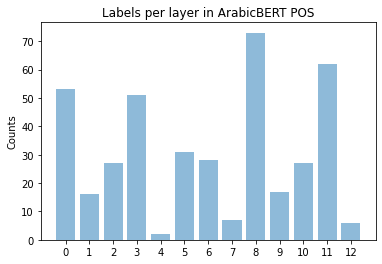

In [47]:
plot_neurons_per_layer(ordering[:400],title='Labels per layer in ArabicBERT POS')

In [ ]:
plot_neurons_per_layer(ordering[:cutoffs[5]],title='Labels per layer in mBERT POS')

# Train on top N neurons

In [48]:
X_selected = utils.filter_activations_keep_neurons(ordering[:400], X)

In [49]:
X_selected.shape

(17758, 400)

Train 

In [45]:
model_selected = utils.train_logreg_model(X_selected, y, lambda_l1=0.00001, lambda_l2=0.00001)

Training classification model
Creating model...
Number of training instances: 17758
Number of classes: 110



Epoch: [1/10], Loss: 0.0869



Epoch: [2/10], Loss: 0.0681



Epoch: [3/10], Loss: 0.0642



Epoch: [4/10], Loss: 0.0623



Epoch: [5/10], Loss: 0.0613



Epoch: [6/10], Loss: 0.0606



Epoch: [7/10], Loss: 0.0602



Epoch: [8/10], Loss: 0.0599



Epoch: [9/10], Loss: 0.0596



Epoch: [10/10], Loss: 0.0595


In [46]:
utils.evaluate_model(model_selected, X_selected, y, idx_to_class=idx2label)


Score (accuracy) of the model: 0.61


{'__OVERALL__': 0.6143709877238428,
 'PREP+NOUN+NSUFF+NSUFF': 0.0,
 'PREP+ADJ': 0.0,
 'CONJ+PREP+NOUN+NSUFF+PRON': 0.0,
 'FOREIGN': 0.37777777777777777,
 'CONJ+NOUN+NSUFF': 0.0,
 'CONJ+PRON': 0.8428571428571429,
 'DET+NUM': 0.0,
 'PREP+PART': 0.0,
 'CONJ+ADJ+PRON': 0.0,
 'PREP+DET': 0.0,
 'ADV': 0.0,
 'DET+NOUN+NSUFF': 0.43016069221260816,
 'DET': 0.0,
 'CONJ+FUT_PART': 0.0,
 'CONJ+PREP+NOUN': 0.0,
 'PREP+NUM+NSUFF': 0.0,
 'NUM+CASE': 0.0,
 'CONJ+CONJ': 0.0,
 'DET+NOUN+NSUFF+NSUFF': 0.0,
 'CONJ+PREP': 0.0,
 'CONJ+PART/CONJ+PREP+PART': 0.0,
 'NOUN+NSUFF': 0.27771911298838436,
 'PREP': 0.8773584905660378,
 'DET+ADJ/DET+NUM': 0.0,
 'NOUN': 0.7649390243902439,
 'CONJ+PREP+DET+NOUN': 0.0,
 'ADJ+CASE': 0.1271186440677966,
 'CONJ+V+PRON': 0.5727272727272728,
 'PREP+PART/CONJ': 0.7391304347826086,
 'NUM': 0.7442528735632183,
 'NOUN+NSUFF+PRON': 0.08823529411764706,
 'PREP+DET+NOUN+NSUFF': 0.19696969696969696,
 'CONJ+ADJ+CASE': 0.0,
 'ADJ+NSUFF/NOUN+NSUFF': 0.0,
 'CONJ+NOUN+CASE': 0.0,
 'PREP+A

# Further analysis

In [13]:
top_neurons = utils.get_top_neurons(model, 0.01, label2idx)

In [14]:
top_neurons

(array([6146, 2053, 6150, 4103, 2057, 2058,   10, 8206, 8207, 2065, 6166,
        2073,   37,   40, 8233, 6186,   47, 2045, 6194,   51, 2102, 6199,
        8248, 6201, 6208,   68, 4166, 8263, 2119, 6217, 6218, 2123, 6222,
          79, 8271, 6227, 6228, 2133, 6230, 8282, 6235,   98, 6242,  101,
        6248, 8298, 2154, 2156, 6252, 8302, 4207,  112, 6257, 4210,  106,
        2164, 8310, 6263, 8311, 2169, 6266,  125, 6272, 2176,  134, 8328,
        8332, 8336, 4244, 6295, 6303, 2209, 8356,  164, 6311, 6312, 6315,
        2220, 2221, 8366, 8367, 6320, 6327, 6328, 4280,  186, 8381, 2241,
        2244, 8388,  199, 6344, 4303,  208,  210, 2260, 8406, 6358, 6362,
         219, 8413, 2270, 6366, 2273, 4322, 8420, 4324, 8423,  233, 2286,
         238, 4337, 8189,  244, 2296,  251, 2300,  253, 6401, 6412, 6414,
        2319, 8464, 4370, 8466, 6420, 6428,  286,  289, 8482, 8483, 8486,
        2344, 4396, 6449, 6450, 2354,  307, 4405,  310, 6455, 4402, 6458,
         315,  317, 6462, 2366, 6465, 

In [27]:
for tag in top_neurons[1].keys():
    print(tag, len(top_neurons[1][tag]))

PREP+NOUN+NSUFF+NSUFF 1
PREP+ADJ 3
CONJ+PREP+NOUN+NSUFF+PRON 11
FOREIGN 1
CONJ+NOUN+NSUFF 3
CONJ+PRON 2
DET+NUM 9
PREP+PART 3
CONJ+ADJ+PRON 2
PREP+DET 1
ADV 7
DET+NOUN+NSUFF 5
DET 20
CONJ+FUT_PART 19
CONJ+PREP+NOUN 4
PREP+NUM+NSUFF 19
NUM+CASE 19
CONJ+CONJ 22
DET+NOUN+NSUFF+NSUFF 1
CONJ+PREP 1
CONJ+PART/CONJ+PREP+PART 32
NOUN+NSUFF 6
PREP 3
DET+ADJ/DET+NUM 20
NOUN 7
CONJ+PREP+DET+NOUN 22
ADJ+CASE 2
CONJ+V+PRON 2
PREP+PART/CONJ 2
NUM 4
NOUN+NSUFF+PRON 2
PREP+DET+NOUN+NSUFF 3
CONJ+ADJ+CASE 19
ADJ+NSUFF/NOUN+NSUFF 6
CONJ+NOUN+CASE 4
PREP+ADJ+NSUFF 3
ADJ+NSUFF 3
PREP+DET+NOUN+NSUFF+NSUFF 9
PUNC 2
NOUN+CASE 2
FUT_PART 1
PART/NOUN 13
CONJ+NUM+NSUFF 25
CONJ+NOUN+PRON 4
NOUN+NSUFF/ADJ+NSUFF 19
PART/PREP+PART 32
PREP+V+PRON 1
PART 3
DET+ADJ 4
CONJ+PART+PRON 16
CONJ+ADJ+NSUFF 15
FUT_PART+V 2
V+PRON+PRON 7
ADJ 4
ABBREV 17
DET+NOUN 6
CONJ+ADV 22
DET+NUM+NSUFF 1
V 4
CONJ+DET+NUM+NSUFF 1
PART/NOUN+PART 28
DET+ADJ/DET+NOUN 1
NUM+NSUFF 3
ADJ+NSUFF+NSUFF 5
PREP+V 14
PREP+NOUN+NSUFF 3
PREP+ADJ+PRON 19
A

In [26]:
top_neurons[1]['PREP+DET+NOUN']

array([1944, 2053, 6458])

In [23]:
nlayers = np.floor_divide(top_neurons[1]['NOUN'],768)

In [25]:
np.unique(nlayers, return_counts=True)

(array([1, 2, 3, 6, 8]), array([1, 2, 1, 1, 2]))

In [ ]:
nlayers = np.floor_divide(toplayers,layersize)
(unique, counts) = np.unique(nlayers, return_counts=True)
layersLabels = np.arange(numberlayers)
layersCounts = np.zeros(numberlayers)

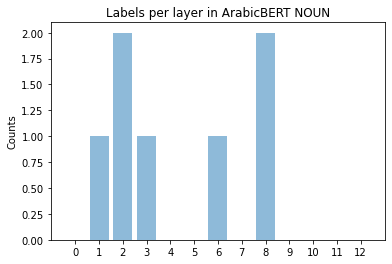

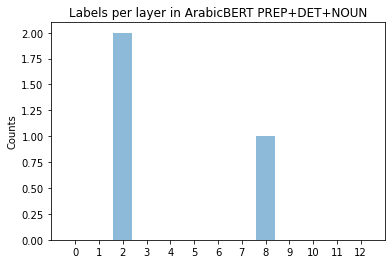

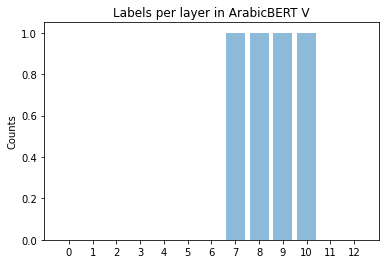

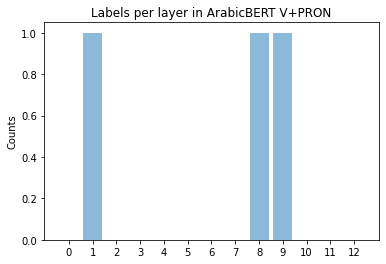

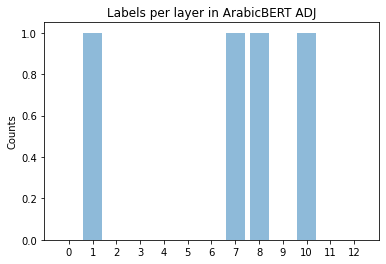

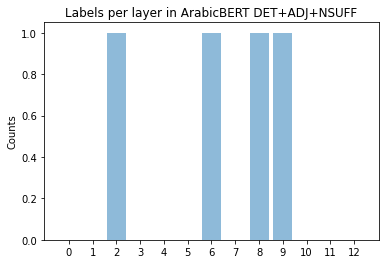

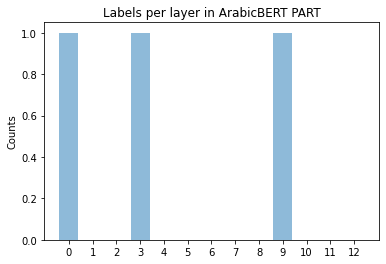

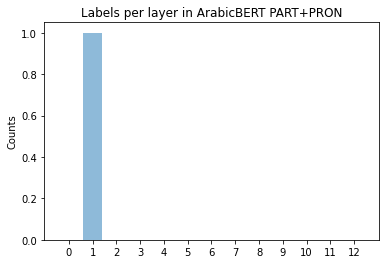

In [20]:
for tag in ['NOUN', 'PREP+DET+NOUN', 'V', 'V+PRON', 'ADJ', 'DET+ADJ+NSUFF' , 'PART', 'PART+PRON']:
    plot_neurons_per_layer(top_neurons[1][tag],title='Labels per layer in ArabicBERT '+tag)

In [ ]:
plot_neurons_per_layer(top_neurons[1]['DET+NOUN'],title='Labels per layer in QARiB DET+NOUN')

In [ ]:
X_zeroed = utils.zero_out_activations_keep_neurons(ordering[:10], X)
utils.evaluate_model(model, X_zeroed, y, idx_to_class=idx2label)

In [ ]:
activations

In [ ]:
import aux_classifier.visualization as visualization
visualization.visualize_activations("في إجراءات استثنائية بسبب وباء كورونا .", activations[0][:, ordering[0]])

In [ ]:
import svgwrite
FONT_SIZE = 20
MARGIN = 10
CHAR_LIMIT = 61
def break_lines(text, limit=50):
    lines = []
    curr_line = ""
    for token in text.split(' '):
        if len(curr_line) + 1 + len(token) < limit:
            curr_line += token + " "
        else:
            lines.append(curr_line[:-1])
            curr_line = token + " "
    lines.append(curr_line[:-1])
    return lines

def get_rect_style(color, opacity):
    return """opacity:%0.5f;
            fill:%s;
            fill-opacity:1;
            stroke:none;
            stroke-width:0.26499999;
            stroke-linecap:round;
            stroke-linejoin:miter;
            stroke-miterlimit:4;
            stroke-dasharray:none;
            stroke-dashoffset:0;
            stroke-opacity:1""" % (opacity, color)

def get_text_style(font_size):
    return """font-style:normal;
            font-variant:normal;
            font-weight:normal;
            font-stretch:normal;
            font-size:%0.2fpx;
            line-height:125%%;
            font-family:monospace;
            -inkscape-font-specification:'Arial Unicode MS, Normal';
            font-variant-ligatures:none;
            font-variant-caps:normal;
            font-variant-numeric:normal;
            text-align:start;
            writing-mode:lr-tb;
            text-anchor:start;
            stroke-width:0.26458332px""" % (font_size)


In [ ]:
text = 'في إجراءات استثنائية بسبب وباء كورونا .'
lines = break_lines(text, limit=CHAR_LIMIT)
char_width = FONT_SIZE*0.59
char_height = FONT_SIZE*1.25

In [ ]:
lines

In [ ]:
image_height = len(lines) * char_height * 1.2
image_width = CHAR_LIMIT * char_width

dwg = svgwrite.Drawing("tmp.svg", size=(image_width, image_height),
                    profile='full')
dwg.viewbox(0, 0, image_width, image_height)


In [ ]:
darken=2
colors=["#d35f5f", "#00aad4"]
scores = activations[0][:, ordering[0]]
offset = 0

In [ ]:
group = dwg.g()
for _ in range(darken):
    word_idx = 0
    for line_idx, line in enumerate(lines):
        char_idx = 0
        max_score = max(scores)
        min_score = abs(min(scores))
        limit = max(max_score, min_score)
        for word in line.split(' '):
            print('W:',word)
            score = scores[word_idx]
            if score > 0:
                color = colors[1]
                opacity = score/limit
            else:
                color = colors[0]
                opacity = abs(score)/limit

            for _ in word:
                rect_insert = (0 + char_idx * char_width, offset + 7 + line_idx * char_height)
                rect_size = ("%.2fpx"%(char_width), "%0.2fpx"%(char_height))
                group.add(
                    dwg.rect(insert=rect_insert,
                            size=rect_size,
                            style=get_rect_style(color, opacity)
                            )
                )
                char_idx += 1

            final_rect_insert = (0 + char_idx * char_width, offset + 7 + line_idx * char_height)
            final_rect_size = ("%.2fpx"%(char_width), "%0.2fpx"%(char_height))
            group.add(
                dwg.rect(insert=final_rect_insert,
                        size=final_rect_size,
                        style=get_rect_style(color, opacity)
                        )
            )

            char_idx += 1
            word_idx += 1

    for line_idx, line in enumerate(lines):
        text_insert = (0, offset + FONT_SIZE*1.25*(line_idx+1))
        print(text_insert,text)
        text = dwg.text(text,
                        insert=text_insert,
                        fill='black',
                        style=get_text_style(FONT_SIZE))
        group.add(text)
offset += FONT_SIZE*1.25*len(lines) + MARGIN

dwg.add(group)

In [ ]:
dwg